# 🗺️ Jour 12 : Analyse Spatiale Avancée avec `geopandas`

Dans ce deuxième volet des données géographiques, nous allons :
- Calculer des **distances** et des **centroïdes**
- Effectuer des **jointures spatiales** (spatial joins)
- Appliquer des **opérations géométriques** (intersection, union)

Ces manipulations permettent d'enrichir nos données géographiques pour la prise de décision ou la visualisation avancée.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

## 🌍 Chargement de la carte du monde

In [3]:
world = gpd.read_file("../Dataset/maps/ne_110m_admin_0_countries.shp")

## 🏥 Création de points fictifs (ex: hôpitaux)

In [4]:
hospital_coords = [(30, -1), (35, 0), (25, -2)]  # long, lat (en Afrique de l'Est)
hospitals = gpd.GeoDataFrame(geometry=[Point(xy) for xy in hospital_coords],
                             crs='EPSG:4326')
hospitals['name'] = ['Hopital A', 'Hopital B', 'Hopital C']
hospitals

,geometry,name
0,POINT (30 -1),Hopital A
1,POINT (35 0),Hopital B
2,POINT (25 -2),Hopital C


## 🗺️ Visualisation des hôpitaux sur la carte

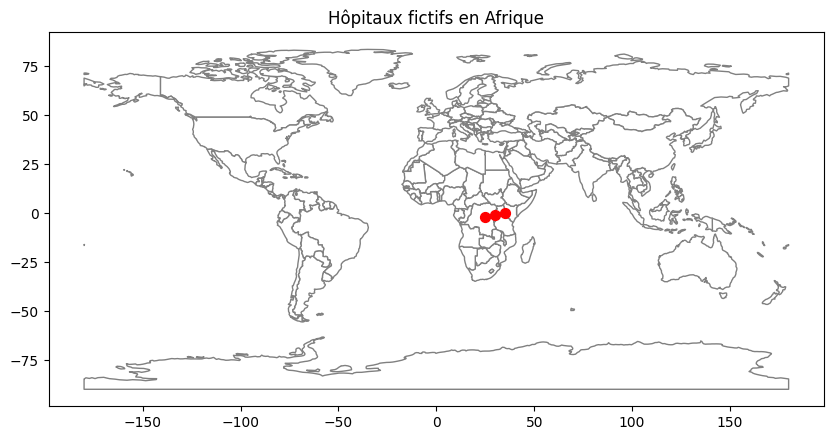

In [5]:
base = world.plot(color='white', edgecolor='gray', figsize=(10, 6))
hospitals.plot(ax=base, color='red', markersize=50)
plt.title('Hôpitaux fictifs en Afrique')
plt.show()

## Pointer les hôpitaux sur la carte de l'Afrique

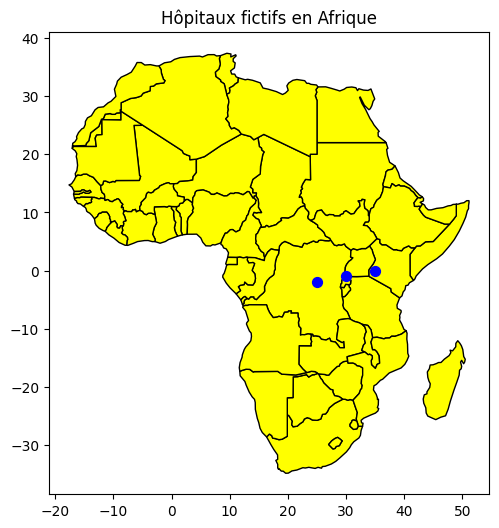

In [19]:
africa = world[world['CONTINENT'] == 'Africa']
africa_base = africa.plot(color='yellow', edgecolor='black', figsize=(10, 6))
hospitals.plot(ax=africa_base, color='blue', markersize=50)
plt.title('Hôpitaux fictifs en Afrique')
plt.show()

## 📍 Calcul du centroïde des pays

In [8]:
africa = world[world['CONTINENT'] == 'Africa']
africa['centroid'] = africa.geometry.centroid
africa[['SOVEREIGNT', 'centroid']].head()

C:\Users\Destin Biringanine\AppData\Local\Temp\ipykernel_14432\669019053.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa['centroid'] = africa.geometry.centroid
c:\Users\Destin Biringanine\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,SOVEREIGNT,centroid
1,United Republic of Tanzania,POINT (34.75299 -6.25773)
2,Western Sahara,POINT (-12.13783 24.29117)
11,Democratic Republic of the Congo,POINT (23.58296 -2.85028)
12,Somalia,POINT (45.7267 4.75235)
13,Kenya,POINT (37.79156 0.59597)


## 📏 Calcul des distances entre un hôpital et les pays

In [12]:
from shapely.ops import nearest_points
ref_point = hospitals.geometry[0]  # Hopital A
africa['distance_km'] = africa.geometry.distance(ref_point) * 111  # approx. conversion deg -> km
africa[['SOVEREIGNT', 'distance_km']].sort_values('distance_km').head()

C:\Users\Destin Biringanine\AppData\Local\Temp\ipykernel_14432\1506243448.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  africa['distance_km'] = africa.geometry.distance(ref_point) * 111  # approx. conversion deg -> km
c:\Users\Destin Biringanine\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,SOVEREIGNT,distance_km
168,Uganda,0.000000
169,Rwanda,34.629273
11,Democratic Republic of the Congo,46.255709
1,United Republic of Tanzania,48.862946
75,Burundi,149.838338


## 🔗 Jointure spatiale : associer hôpitaux aux pays

In [15]:
joined = gpd.sjoin(hospitals, africa, how='left', predicate='within')
joined[['name', 'SOVEREIGNT']]

,name,SOVEREIGNT
0,Hopital A,Uganda
1,Hopital B,Kenya
2,Hopital C,Democratic Republic of the Congo


## 📝 Exercices
- Ajoutez d'autres points (écoles, centres de santé) et calculez leurs distances à chaque pays.
- Trouvez pour chaque point le pays le plus proche.
- Regroupez les points par pays et comptez-les (`groupby`).